In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('USA_Housing.csv')

In [3]:
import seaborn as sns

In [5]:
#show column names
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [13]:
#rename columns
data.rename(columns={'Avg. Area Income': 'median_income', 'Avg. Area House Age':'house_age', 'Avg. Area Number of Rooms': 'bedrooms'}, inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   median_income                 5000 non-null   float64
 1   house_age                     5000 non-null   float64
 2   bedrooms                      5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 312.5+ KB


In [15]:
#summary stats
data.describe()

,median_income,house_age,bedrooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


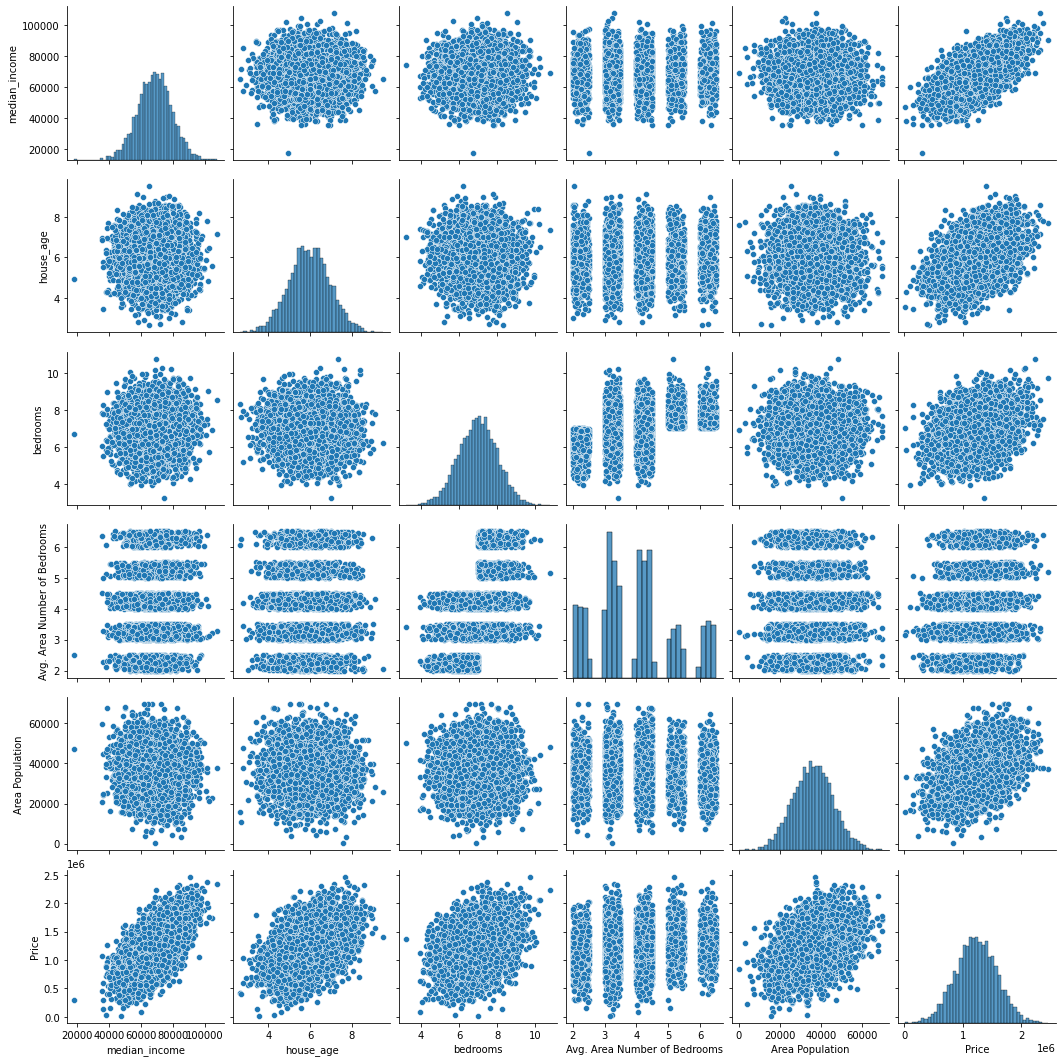

In [16]:
#pairplots for the columns
sns.pairplot(data)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

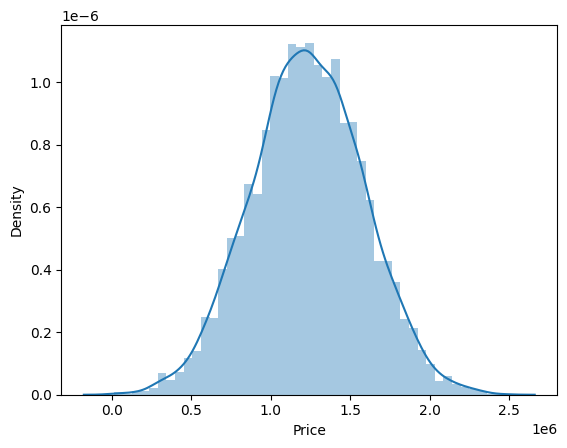

In [20]:
#view a distribution of your target column (price)
sns.distplot(data['Price'])

In [21]:
#show correlation between variables
data.corr()

,median_income,house_age,bedrooms,Avg. Area Number of Bedrooms,Area Population,Price
median_income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
house_age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
bedrooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:>

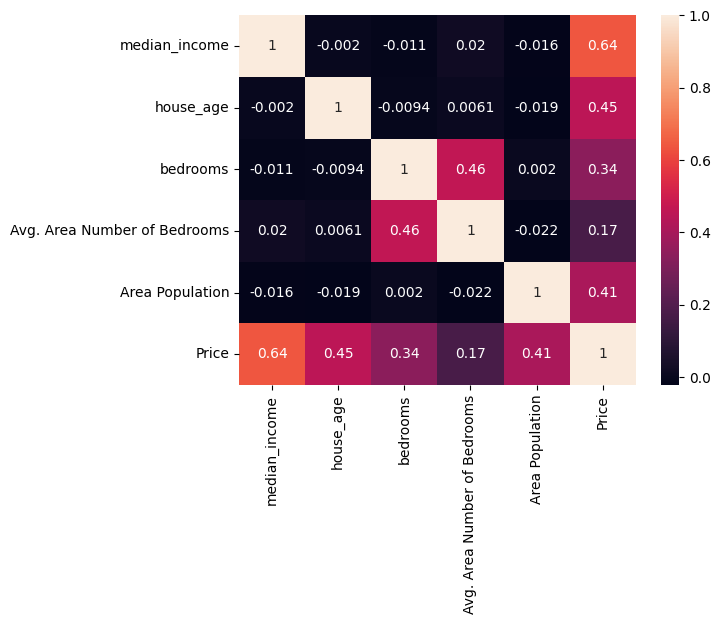

In [23]:
#heatmap
sns.heatmap(data.corr(),annot=True)

In [28]:
data.shape

(5000, 7)

In [24]:
data.columns

Index(['median_income', 'house_age', 'bedrooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [25]:
#1. split dataset into features and target value
x = data[['median_income', 'house_age', 'bedrooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

In [29]:
from sklearn.model_selection import train_test_split

#2. split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=101)

In [31]:
#3. import the linear regression model
from sklearn.linear_model import LinearRegression

#create an instance of LinearRegression class
lm = LinearRegression()

#train my model onmy training data
lm.fit(x_train, y_train)

LinearRegression()

In [32]:
lm.intercept_

-2640159.7968526958

In [33]:
#check the coefficients
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [36]:
#create a dataframe of coefficients
cdf = pd.DataFrame(lm.coef_, x_train.columns, columns=['Coeff'])

In [37]:
cdf

,Coeff
median_income,21.528276
house_age,164883.282027
bedrooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [ ]:
## Making Predictions Using our Model ##

In [38]:
predictions = lm.predict(x_test)

In [39]:
predictions

array([1260960.70567627,  827588.75560329, 1742421.24254344, ...,
        372191.40626917, 1365217.15140898, 1914519.5417888 ])

In [40]:
predictions.shape

(2000,)

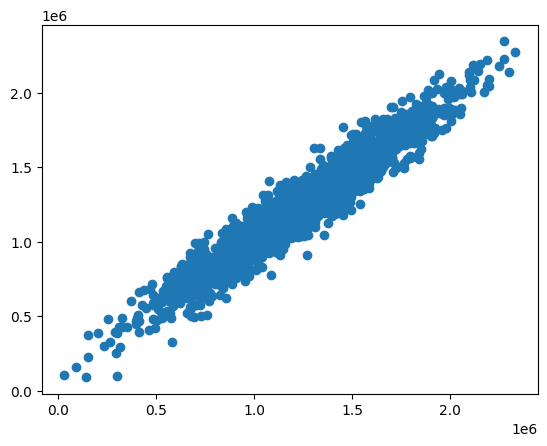

In [41]:
#compare predictions with actual values
plt.scatter(y_test, predictions)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

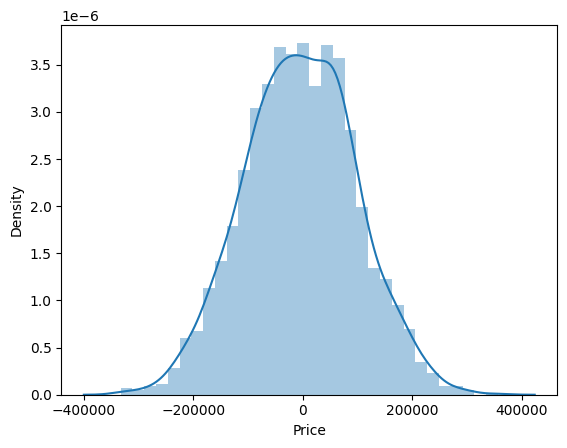

In [42]:
#check the distribution of the residuals
sns.distplot(y_test - predictions)